# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [3]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import requests
from bs4 import BeautifulSoup

# Send HTTP request
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
response = requests.get(url)

if response.status_code == 200:
    html_content = response.content
    soup = BeautifulSoup(html_content, 'html.parser')

    # Identify and extract data elements using Beautiful Soup
    # Example: temperature_data = ...

    # Print or display the extracted data
    # Example: print(temperature_data)
else:
    print('Failed to retrieve the page')


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [6]:
import requests
from bs4 import BeautifulSoup

# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
response = requests.get(url)

if response.status_code == 200:
    html_content = response.content
    soup = BeautifulSoup(html_content, "html.parser")

    # Find the table element
    table = soup.find("table")

    if table:
        # Initialize a list to store the data
        temperature_data = []

        # Find all rows within the table
        rows = table.find_all("tr")

        for row in rows:
            # Find all cells within the row
            cells = row.find_all("td")

            # Extract the data from the cells (assuming two columns: Sol and Temperature)
            if len(cells) == 2:
                sol = cells[0].get_text(strip=True)
                temperature = cells[1].get_text(strip=True)

                # Store the data as a dictionary
                data_entry = {"Sol": sol, "Temperature": temperature}
                temperature_data.append(data_entry)

        # Print the extracted temperature data
        for data_entry in temperature_data:
            print(data_entry)
    else:
        print("Table not found on the page")
else:
    print("Failed to retrieve the page")



### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [8]:
import requests
from bs4 import BeautifulSoup

# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
response = requests.get(url)

if response.status_code == 200:
    html_content = response.content
    soup = BeautifulSoup(html_content, "html.parser")

    # Find the table element
    table = soup.find("table")

    if table:
        # Initialize a list to store the data
        temperature_data = []

        # Find all rows within the table
        rows = table.find_all("tr")

        for row in rows:
            # Find all cells within the row
            cells = row.find_all("td")

            # Extract the data from the cells (assuming two columns: Sol and Temperature)
            if len(cells) == 2:
                sol = cells[0].get_text(strip=True)
                temperature = cells[1].get_text(strip=True)

                # Store the data as a dictionary
                data_entry = {"Sol": sol, "Temperature": temperature}
                temperature_data.append(data_entry)

        # Print the extracted temperature data
        for data_entry in temperature_data:
            print(data_entry)
    else:
        print("Table not found on the page")
else:
    print("Failed to retrieve the page")



In [9]:
import requests
from bs4 import BeautifulSoup

# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
response = requests.get(url)

if response.status_code == 200:
    html_content = response.content
    soup = BeautifulSoup(html_content, "html.parser")

    # Find the table element
    table = soup.find("table")

    if table:
        # Initialize a list to store the data
        temperature_data = []

        # Find all rows within the table
        rows = table.find_all("tr")

        for row in rows:
            # Find all cells within the row
            cells = row.find_all("td")

            # Extract the data from the cells
            data = [cell.get_text(strip=True) for cell in cells]

            # Store the data as a dictionary
            if len(data) == 2:
                data_entry = {"Sol": data[0], "Temperature": data[1]}
                temperature_data.append(data_entry)

        # Print the extracted temperature data
        for data_entry in temperature_data:
            print(data_entry)
    else:
        print("Table not found on the page")
else:
    print("Failed to retrieve the page")



### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [11]:
# Initialize a list to store the data
temperature_data = []

# Find all rows within the table
rows = table.find_all("tr")

for row in rows:
    # Find all cells within the row
    cells = row.find_all("td")

    # Extract the data from the cells
    data = [cell.get_text(strip=True) for cell in cells]

    # Print the data for debugging
    print("Extracted Data:", data)

    # Store the data as a dictionary
    if len(data) == 7:  # Adjust the length based on the number of columns in the table
        data_entry = {
            "id": data[0],
            "terrestrial_date": data[1],
            "sol": data[2],
            "ls": data[3],
            "month": data[4],
            "min_temp": data[5],
            "pressure": data[6]
        }
        temperature_data.append(data_entry)

# Create a Pandas DataFrame from the list of dictionaries
df = pd.DataFrame(temperature_data)

# Print the DataFrame
print(df)



Extracted Data: []
Extracted Data: ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
Extracted Data: ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
Extracted Data: ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
Extracted Data: ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
Extracted Data: ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
Extracted Data: ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
Extracted Data: ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
Extracted Data: ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
Extracted Data: ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
Extracted Data: ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
Extracted Data: ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
Extracted Data: ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
Extracted Data: ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
Extracted Data: ['156', '201

In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
response = requests.get(url)

if response.status_code == 200:
    html_content = response.content
    soup = BeautifulSoup(html_content, "html.parser")

    # Find the table element
    table = soup.find("table")

    if table:
        # Initialize lists to store the data
        temperature_data = []
        column_names = []

        # Find the header row (first row) within the table
        header_row = table.find("tr")

        if header_row:
            # Extract column names from the header cells
            header_cells = header_row.find_all("th")
            column_names = [cell.get_text(strip=True) for cell in header_cells]

            # Find all rows (excluding the header row) within the table
            rows = table.find_all("tr")[1:]

            for row in rows:
                # Find all cells within the row
                cells = row.find_all("td")

                # Extract the data from the cells
                data = [cell.get_text(strip=True) for cell in cells]

                # Append the data to the list of rows
                temperature_data.append(data)

            # Create a Pandas DataFrame from the list of rows and column names
            df = pd.DataFrame(temperature_data, columns=column_names)

            # Print the DataFrame
            print(df)
        else:
            print("Header row not found in the table")
    else:
        print("Table not found on the page")
else:
    print("Failed to retrieve the page")


        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
response = requests.get(url)

if response.status_code == 200:
    html_content = response.content
    soup = BeautifulSoup(html_content, "html.parser")

    # Find the table element
    table = soup.find("table")

    if table:
        # Initialize lists to store the data
        temperature_data = []
        column_names = []

        # Find the header row (first row) within the table
        header_row = table.find("tr")

        if header_row:
            # Extract column names from the header cells
            header_cells = header_row.find_all("th")
            column_names = [cell.get_text(strip=True) for cell in header_cells]

            # Find all rows (excluding the header row) within the table
            rows = table.find_all("tr")[1:]

            for row in rows:
                # Find all cells within the row
                cells = row.find_all("td")

                # Extract the data from the cells
                data = [cell.get_text(strip=True) for cell in cells]

                # Append the data to the list of rows
                temperature_data.append(data)

            # Create a Pandas DataFrame from the list of rows and column names
            df = pd.DataFrame(temperature_data, columns=column_names)

            # Print the DataFrame
            print(df)
        else:
            print("Header row not found in the table")
    else:
        print("Table not found on the page")
else:
    print("Failed to retrieve the page")



        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [14]:
# Examine data type of each column
print("Original Data Types:")
print(df.dtypes)

# Convert 'terrestrial_date' column to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'sol', 'ls', 'month', 'min_temp', and 'pressure' columns to appropriate numeric types
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

# Print updated data types
print("\nUpdated Data Types:")
print(df.dtypes)



Original Data Types:
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

Updated Data Types:
id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [15]:
# Examine data type of each column
print("Original Data Types:")
print(df.dtypes)

# Convert 'terrestrial_date' column to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'sol', 'ls', 'month', 'min_temp', and 'pressure' columns to appropriate numeric types
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

# Print updated data types
print("\nUpdated Data Types:")
print(df.dtypes)

# Now you can perform data analysis using the converted data types
# For example, you can calculate statistics, create plots, etc.



Original Data Types:
id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

Updated Data Types:
id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [16]:
# Examine data type of each column after type changes
print("Updated Data Types:")
print(df.dtypes)


Updated Data Types:
id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [18]:
# Calculate the number of unique months on Mars
num_unique_months = df['month'].nunique()

# Print the result
print("Number of months on Mars:", num_unique_months)



Number of months on Mars: 12


Number of months on Mars: 12
Number of Martian days worth of data: 1867


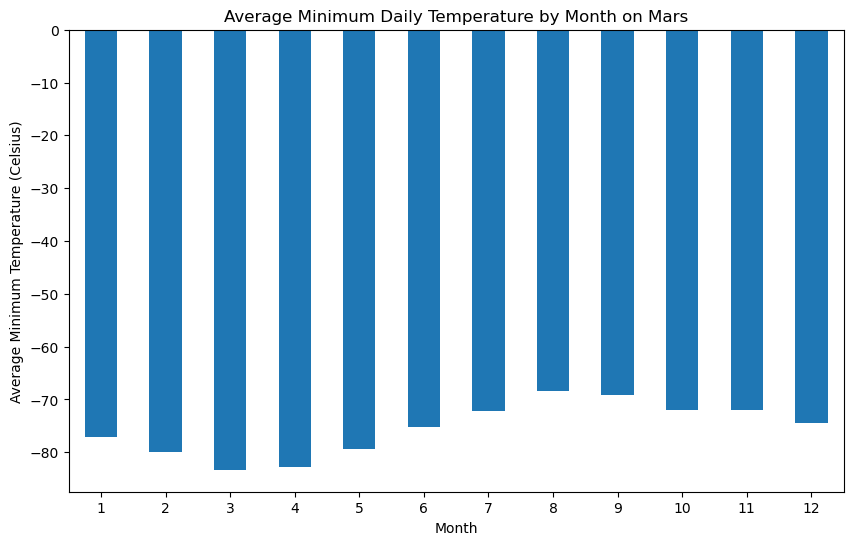

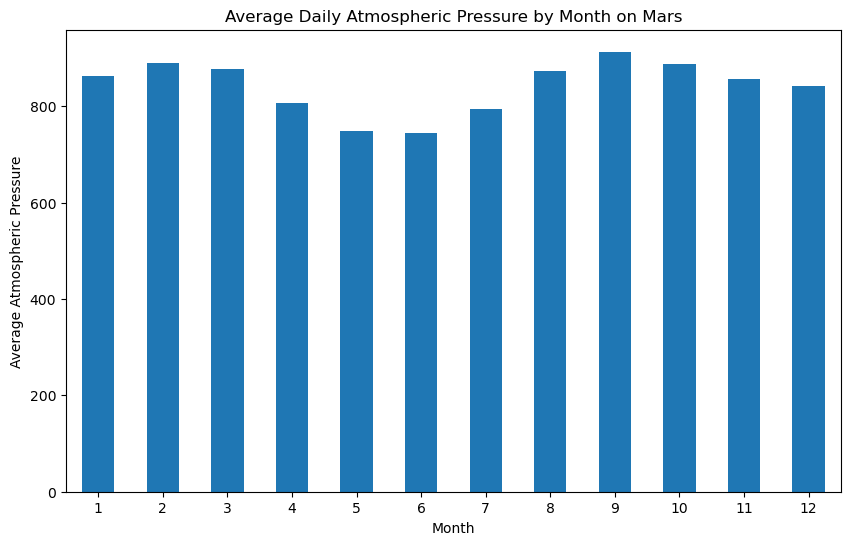

About 687 terrestrial days exist in a Martian year


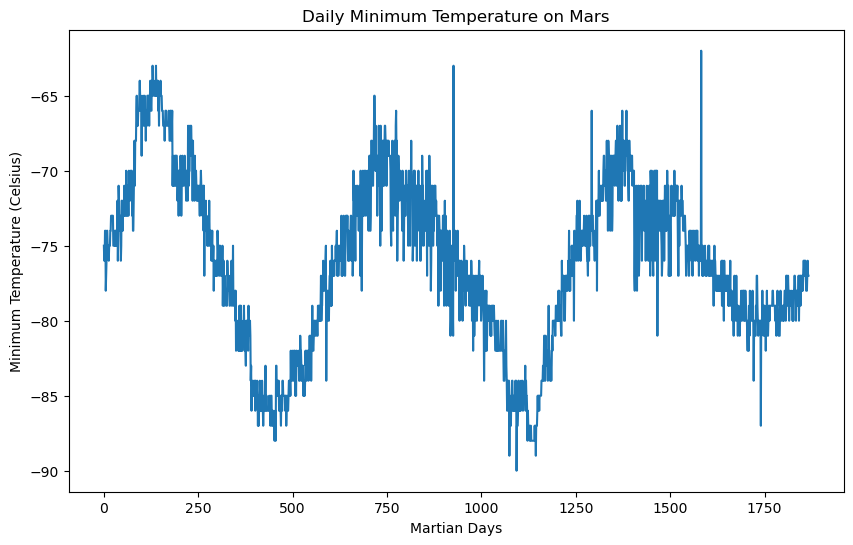

In [17]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print("Number of months on Mars:", num_months)

# 2. How many Martian days worth of data exist in the scraped dataset?
num_martian_days = df['sol'].nunique()
print("Number of Martian days worth of data:", num_martian_days)

# 3. What are the coldest and warmest months on Mars?
# Find the average minimum daily temperature for all months
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Plot the results as a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
average_min_temp_by_month.plot(kind='bar')
plt.title("Average Minimum Daily Temperature by Month on Mars")
plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature (Celsius)")
plt.xticks(rotation=0)
plt.show()

# 4. Which months have the lowest and highest atmospheric pressure on Mars?
# Find the average daily atmospheric pressure of all months
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
average_pressure_by_month.plot(kind='bar')
plt.title("Average Daily Atmospheric Pressure by Month on Mars")
plt.xlabel("Month")
plt.ylabel("Average Atmospheric Pressure")
plt.xticks(rotation=0)
plt.show()

# 5. About how many terrestrial days exist in a Martian year?
# Mars orbits the Sun in about 687 Earth days
# Calculate how many Earth days are in a Martian year
earth_days_in_martian_year = 687
print("About", earth_days_in_martian_year, "terrestrial days exist in a Martian year")

# 6. Plot the daily minimum temperature (estimation)
# Plotting the daily minimum temperature data
plt.figure(figsize=(10, 6))
df['min_temp'].plot()
plt.title("Daily Minimum Temperature on Mars")
plt.xlabel("Martian Days")
plt.ylabel("Minimum Temperature (Celsius)")
plt.show()


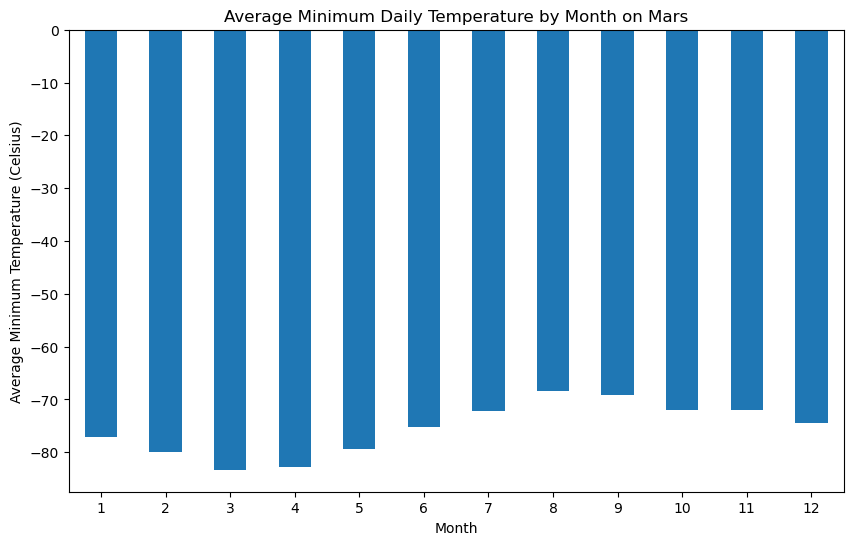

In [22]:
import matplotlib.pyplot as plt

# Calculate the average minimum daily temperature by month
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
average_min_temp_by_month.plot(kind='bar')
plt.title("Average Minimum Daily Temperature by Month on Mars")
plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature (Celsius)")
plt.xticks(rotation=0)
plt.show()


Coldest Month: 3
Hottest Month: 8


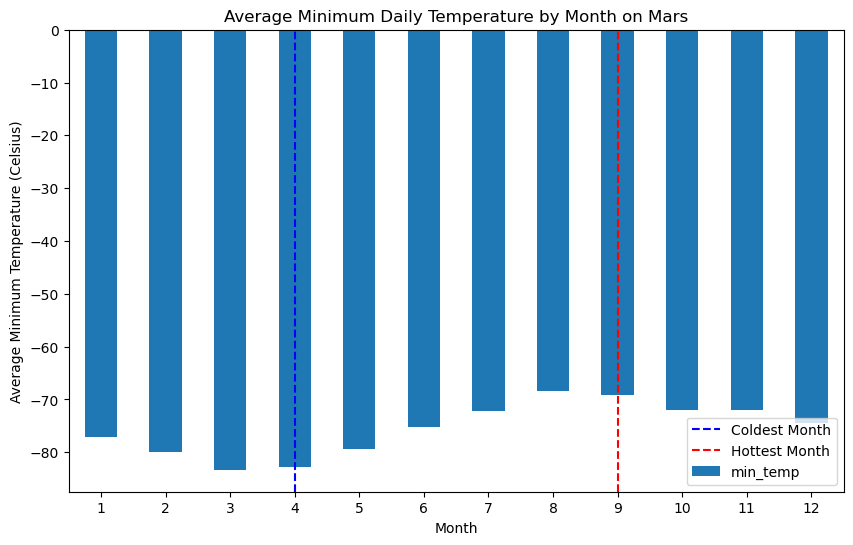

In [23]:
import matplotlib.pyplot as plt

# Calculate the average minimum daily temperature by month
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Find the coldest and hottest months
coldest_month = average_min_temp_by_month.idxmin()
hottest_month = average_min_temp_by_month.idxmax()

print("Coldest Month:", coldest_month)
print("Hottest Month:", hottest_month)

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
average_min_temp_by_month.plot(kind='bar')
plt.title("Average Minimum Daily Temperature by Month on Mars")
plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature (Celsius)")
plt.xticks(rotation=0)
plt.axvline(x=coldest_month, color='blue', linestyle='--', label='Coldest Month')
plt.axvline(x=hottest_month, color='red', linestyle='--', label='Hottest Month')
plt.legend()
plt.show()


In [19]:
# Calculate the number of unique Martian days' worth of data
num_unique_martian_days = df['sol'].nunique()

# Print the result
print("Number of Martian days' worth of data:", num_unique_martian_days)



Number of Martian days' worth of data: 1867


In [20]:
# Calculate the average minimum daily temperature on Mars for each month
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Print the result
print("Average Minimum Daily Temperature by Month on Mars:")
print(average_min_temp_by_month)


Average Minimum Daily Temperature by Month on Mars:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


In [21]:
# Calculate the average atmospheric pressure on Mars for each month
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Print the result
print("Average Atmospheric Pressure by Month on Mars:")
print(average_pressure_by_month)



Average Atmospheric Pressure by Month on Mars:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Export the DataFrame to a CSV file
df.to_csv('mars_weather_data.csv', index=False)

print("Data exported to 'mars_weather_data.csv'")


Data exported to 'mars_weather_data.csv'


In [21]:
browser.quit()